---
---
## **Pacotes**
---
---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro

---
---
## **Carga de Dados**
---
---

In [4]:
# https://github.com/allan-gadelha/Bichinhos_TI_Projetos

imoveis = pd.read_csv('../../../Preco_Imoveis/test.csv')
imoveis_train = pd.read_csv('../../../Preco_Imoveis/train.csv')

In [5]:
# Removendo limite de display de columns e rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
imoveis.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal




---


---



## **Análise Exploratória**


---



In [7]:
print(imoveis.shape)

(1459, 80)


In [8]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
imoveis.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
# Contagem de nulos
imoveis.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

É notável que há uma distruibuição de valores nulos em diversas colunas, é importante investigar as seguintes:<br>1. LotFrontage, 2. Alley, 3. MasVnrType, 4. FireplaceQu, 5. GarageType, 6. GarageYrBlt, 7. GarageFinish, 8. GarageQual, 9. GarageCond, 10. PoolQC, 11. Fence, 12. MiscFeature

In [11]:
# Observando detalhes das váriaveis com alto valor de numeros nulos.
valores = ['Alley', 'MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature']

for collum in valores:
  print('-'*40)
  print(print(imoveis[collum].dtype))
  print(imoveis[collum].value_counts())
  print('-'*40)

----------------------------------------
object
None
Grvl    70
Pave    37
Name: Alley, dtype: int64
----------------------------------------
----------------------------------------
object
None
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64
----------------------------------------
----------------------------------------
object
None
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64
----------------------------------------
----------------------------------------
object
None
Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64
----------------------------------------
----------------------------------------
object
None
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64
----------------------------------------
----------------------------------------
object
None
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: 

Conclusão: Essas variáveis categóricas com alto numero de nulos apenas indica a ausência da váriavel no imóvel, pode ser substituido por uma string para ajustar.

In [12]:
# Detalhes das variáveis numéricas
for colu in imoveis:
    if imoveis[colu].dtype != 'object' and colu != 'Id':

      print('-'*60)
      print(f'{colu} - {imoveis[colu].dtype}')
      std = imoveis.describe().loc['std', colu] # Desvio Padrão
      mean = imoveis.describe().loc['mean', colu] # Média
      CV = (std/mean) * 100 # Coeficiênte de Variação
      print(f'Desvio Padrão: {std}\nMédia: {mean}\nCoeficiente de Variação {CV}')


------------------------------------------------------------
MSSubClass - int64
Desvio Padrão: 42.74687961871836
Média: 57.37834132967786
Coeficiente de Variação 74.50002671410152
------------------------------------------------------------
LotFrontage - float64


Desvio Padrão: 22.376841280775103
Média: 68.58035714285714
Coeficiente de Variação 32.62864501297763
------------------------------------------------------------
LotArea - int64
Desvio Padrão: 4955.517326926446
Média: 9819.161069225496
Coeficiente de Variação 50.467828076042764
------------------------------------------------------------
OverallQual - int64
Desvio Padrão: 1.4368116404730251
Média: 6.078821110349555
Coeficiente de Variação 23.63635340455681
------------------------------------------------------------
OverallCond - int64
Desvio Padrão: 1.1137396032892215
Média: 5.5538039753255655
Coeficiente de Variação 20.053635458459514
------------------------------------------------------------
YearBuilt - int64
Desvio Padrão: 30.39007083720533
Média: 1971.357779300891
Coeficiente de Variação 1.5415806890204709
------------------------------------------------------------
YearRemodAdd - int64
Desvio Padrão: 21.130466908170522
Média: 1983.6627827278958
Coeficiente de Variação 1.0652247

---
---
##  **Tratando Valores NA**
---
---


In [13]:
# Novo dataset com para tratar valores nulos
df_transformed = imoveis.copy()
df_transformed_train = imoveis_train.copy()

In [14]:
# Dicionário com as Colunas e os valores que vão ser colocados
fill_values = {
    'LotFrontage': 0,
    'Alley': 'No alley access',
    'MasVnrType': 'No masonry',
    'FireplaceQu': 'No fireplace',
    'GarageType': 'No garage',
    'GarageYrBlt': 'No garage',
    'GarageFinish': 'No garage',
    'GarageQual': 'No garage',
    'GarageCond': 'No garage',
    'PoolQC': 'No pool',
    'Fence': 'No fence',
    'MiscFeature': 'No MiscFeature',
    'BsmtQual': 'No basement',
    'BsmtCond': 'No basement',
    'BsmtExposure': 'No basement',
    'BsmtFinType1': 'No basement',
    'BsmtFinType2': 'No basement'
}

# Preenche os valores NA na df_transformed
for column, fill_value in fill_values.items():
    df_transformed[column].fillna(fill_value, inplace=True)

# Preenche os valores NA na df_transformed_train
for column, fill_value in fill_values.items():
    df_transformed_train[column].fillna(fill_value, inplace=True)

# Substituindo valores nulos pela média em variáveis numericas
df_transformed['MasVnrArea'].fillna(imoveis.describe().loc['mean', 'MasVnrArea'], inplace=True)
df_transformed_train['MasVnrArea'].fillna(imoveis_train.describe().loc['mean', 'MasVnrArea'], inplace=True)

# Removendo linha unica nulo em váriavel categórica
df_transformed = df_transformed.dropna(subset=['Electrical'])
df_transformed_train = df_transformed_train.dropna(subset=['Electrical'])

# Removendo duplicatas
df_transformed_train.drop_duplicates(inplace=True)
df_transformed.drop_duplicates(inplace=True)

# Removendo outros casos de valores nulos
df_transformed = df_transformed.dropna()
df_transformed_train = df_transformed_train.dropna()

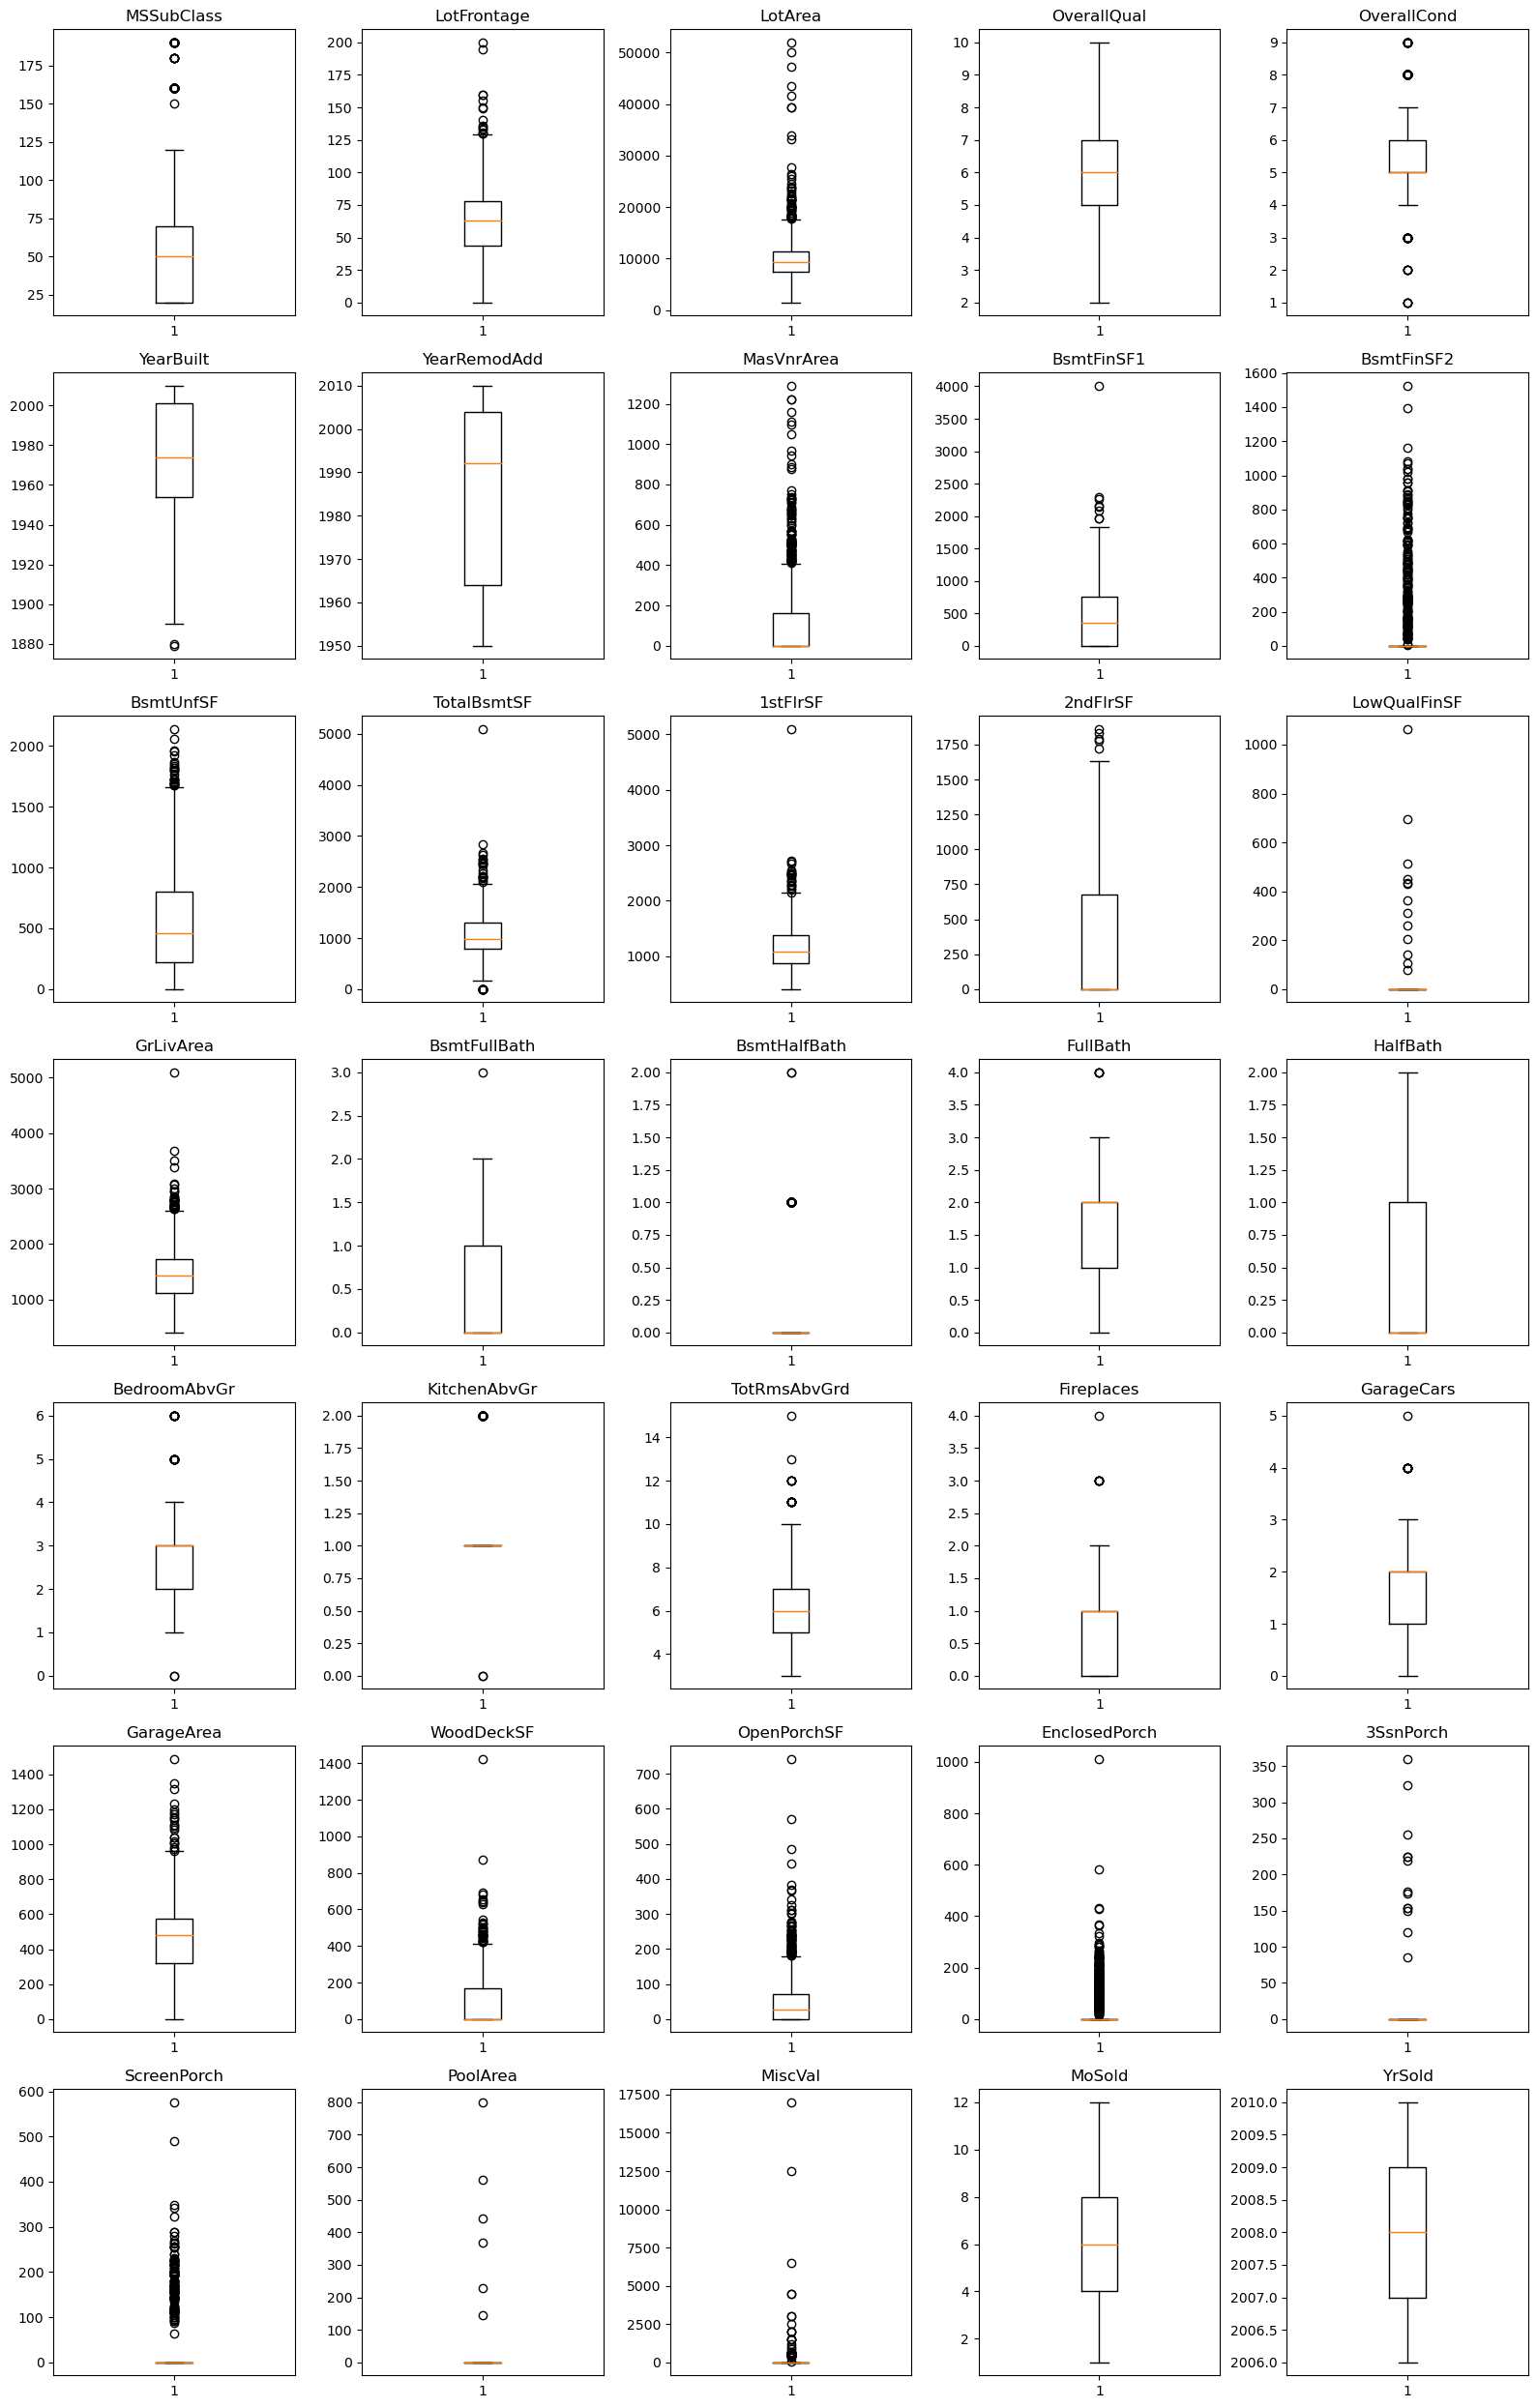

In [15]:
# Detecção de outliers
# O que é o boxplot: https://fernandafperes.com.br/blog/interpretacao-boxplot/
df_income = df_transformed

# Filtrando apenas as colunas numéricas (exceto 'Id')
numeric_columns = [col for col in df_transformed.columns if df_transformed[col].dtype != 'object' and col != 'Id']

# Calculando o número de linhas e colunas para os subplots
num_rows = len(numeric_columns)
num_cols = 5  # Quatro boxplots por linha

# Criando os subplots
fig, axs = plt.subplots(nrows=num_rows//5, ncols=num_cols, figsize=(16, 25))

# Plotando os boxplots para cada coluna numérica
for i, col in enumerate(numeric_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].boxplot(df_income[col], vert=True)
    axs[row_idx, col_idx].set_title(col)

plt.tight_layout()  # Ajustando o espaçamento entre os subplots
plt.show()



---



---


## **Modelo para previsões**


---



In [16]:
# Preparando váriaveis para treinamento: Removendo GarageYrBlt.
df_transformed_train = df_transformed_train.drop('GarageYrBlt', axis=1)
df_transformed= df_transformed.drop('GarageYrBlt', axis=1)

In [17]:
# Aplicando codificação one-hot
#  Sobre one-hot: https://www.escoladnc.com.br/blog/como-realizar-codificacao-onehot-e-rotativas-em-python-para-machine-learning/

''' A coficação one-hot é uma tecnica para lidar com variáveis categóricas.
    Ela gera novas colunas para lidar com os diferentes valores categóricos. '''

categoric_collumns = ['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape',
                      'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                      'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
                      'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                      'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                      'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                      'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                      'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                      'GarageFinish','GarageQual', 'GarageCond', 'PavedDrive',
                      'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] # Colunas categoricas

# Para que todas as váriaveis possíveis sejam utilizadas ao aplicar o one-hot, aqui é realizado um merge entre o df de treine e teste.

df_train_temp = df_transformed_train.drop('SalePrice', axis=1) # Remover SalePrice de train

df_merged = pd.concat([df_transformed, df_train_temp]) # Juntar os dois df
df_merged_one = pd.get_dummies(df_merged, columns = categoric_collumns) # aplicar one-hot
df_merged_one = df_merged_one.drop('Id', axis=1) # remover Id
df_test = df_merged_one[:1447] # Separar o df de test
df_train = df_merged_one[1447:] # Separar o df de Treino

df_train['SalePrice'] = df_transformed_train['SalePrice'] # Inserir a coluna SalePrice ao train novamente.

/tmp/ipykernel_10872/3465968251.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SalePrice'] = df_transformed_train['SalePrice'] # Inserir a coluna SalePrice ao train novamente.


In [18]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No masonry,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,Heatin

In [19]:
# Separar variáveis e treinar modelo
'''
X_train: Esta é a parte do seu conjunto de dados que você usa para treinar o modelo.
  Contém as características (ou variáveis independentes) para as quais você tem a variável de destino (ou variável dependente).

X_test: Esta é a parte do seu conjunto de dados que você usa para testar o modelo. Contém as características para as quais você
  quer que o modelo faça previsões. O modelo não viu esses dados durante o treinamento.

y_train: Esta é a variável de destino correspondente ao X_train. Contém os valores reais que o modelo tenta prever durante o treinamento.

y_test: Esta é a variável de destino correspondente ao X_test. Você não fornece y_test ao modelo. Em vez disso, você usa y_test
 para comparar as previsões do modelo com os valores reais e avaliar o desempenho do modelo.
'''

# Método train-split train
# Sobre o tria-split train: https://medium.com/@viniciussegatto11/separando-um-conjunto-de-dados-em-treino-e-teste-649d5a4d3c84
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['SalePrice']), df_train['SalePrice'], test_size=0.2, random_state=42)


# Artigos sobre modelo
# https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/
model = RandomForestRegressor()

# Treinamento do modelo
model.fit(X_train, y_train)

# Previsão
test_predictions = model.predict(X_test)

------------------------------------------------------------
MSE:  24177.798538954998
RMSE: 155.49211728880343
Coeficiente de Determinação(R2): 0.8917789132940829
------------------------------------------------------------



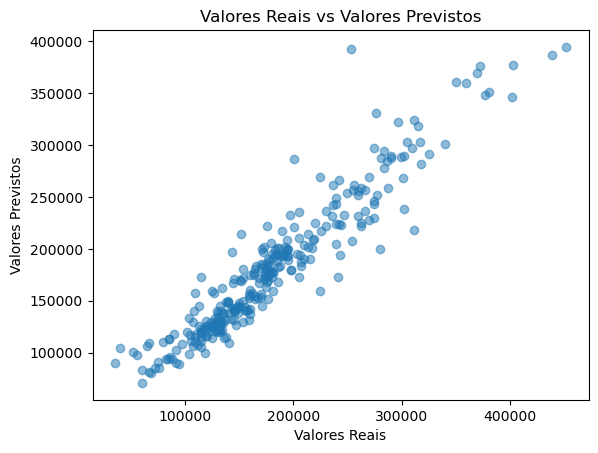

In [20]:
# MSE:  https://shallbd.com/pt/entendendo-o-erro-quadratico-medio-o-que-ele-diz-a-voce-e-como-interpreta-lo/
# RMSE: https://mariofilho.com/rmse-raiz-do-erro-quadratico-medio-em-machine-learning/

mse = mean_squared_error(y_test, test_predictions, squared=False)
rmse = np.sqrt(mse)
print('-'*60)
print(f"MSE:  {mse}")
print(f"RMSE: {rmse}")

# Coeficiente de Determinação: https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste
print(f'Coeficiente de Determinação(R2): {r2_score(y_test,test_predictions)}')
print('-'*60)
print()

# Interpretação do gráfico e R2: https://www.youtube.com/watch?v=RkqGs5qdBf8
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Valores Previstos')
plt.show()

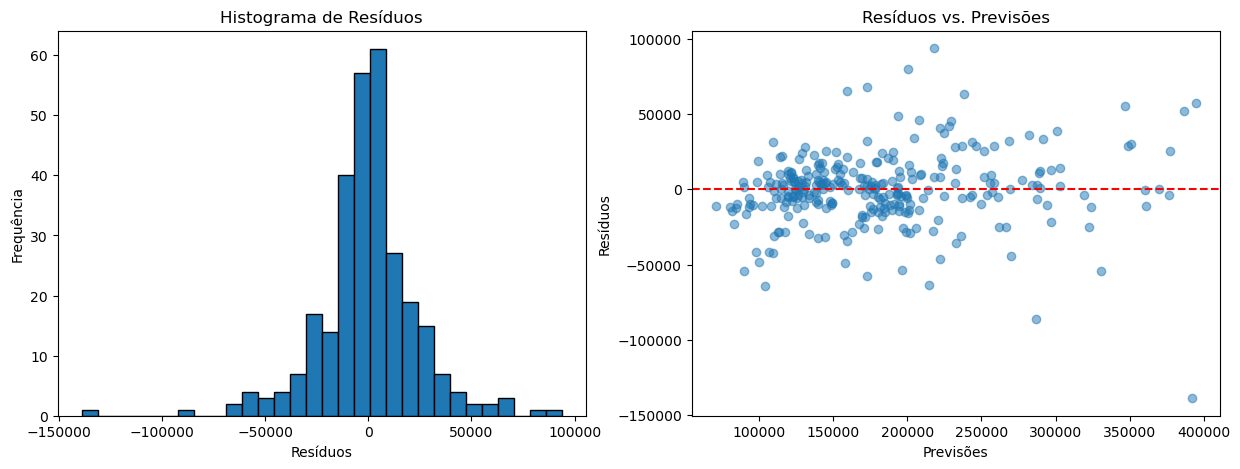

In [21]:
# Oque são residuos: https://statorials.org/pt/residuo/

residuos = y_test - test_predictions

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].hist(residuos, bins=30, edgecolor='black')
axs[0].set_title('Histograma de Resíduos')
axs[0].set_xlabel('Resíduos')
axs[0].set_ylabel('Frequência')

axs[1].scatter(test_predictions, residuos, alpha=0.5)
axs[1].set_title('Resíduos vs. Previsões')
axs[1].set_xlabel('Previsões')
axs[1].set_ylabel('Resíduos')
axs[1].axhline(y=0, color='r', linestyle='--')
plt.show()

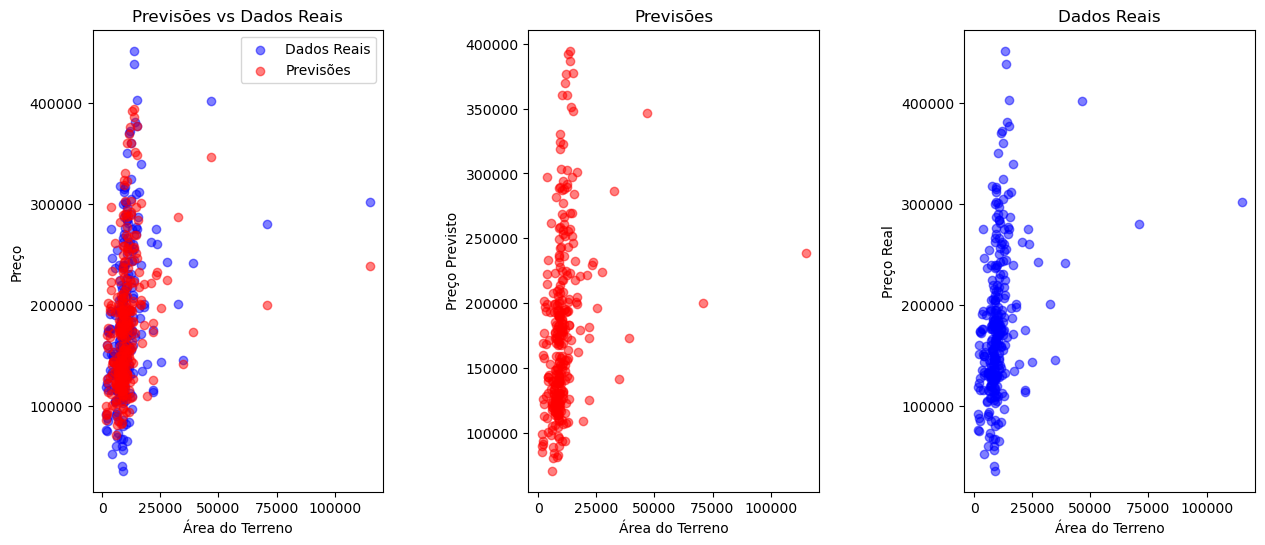

In [22]:
# Gráficos para comparar dados, Previsões do Modelo x Dados Reais em relação ao tamanho do terreno

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

# Dados reais
ax1.scatter(X_test['LotArea'], y_test, color='b', alpha=0.5, label='Dados Reais')
ax1.set_title('Previsões vs Dados Reais')
ax1.set_xlabel("Área do Terreno")
ax1.set_ylabel("Preço")

# Previsão
ax1.scatter(X_test['LotArea'],test_predictions , color='r', alpha=0.5, label='Previsões')

ax1.legend()

# Real isolado
ax2.scatter(X_test['LotArea'], test_predictions, color='r', alpha=0.5)
ax2.set_title('Previsões')
ax2.set_xlabel("Área do Terreno")
ax2.set_ylabel("Preço Previsto")

# Previsão isolada
ax3.scatter(X_test['LotArea'], y_test, color='b', alpha=0.5)
ax3.set_title('Dados Reais')
ax3.set_xlabel("Área do Terreno")
ax3.set_ylabel("Preço Real")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [23]:
# Método k-fold
# https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90


# Definindo o número de folds
k = 5

# Criando o objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Criando o modelo RandomForestRegressor
model = RandomForestRegressor()

# Calculando as pontuações de validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

# Imprimindo as pontuações de validação cruzada
print("Cross-validation scores:", cv_scores)

# Calculando a média das pontuações de validação cruzada
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.85077322 0.86503908 0.85781064 0.71575388 0.86257056]
Mean CV score: 0.8303894787270616


---
---
## **Visualizações**
---
---

In [24]:
# Treinar Modelo
model = RandomForestRegressor()
model.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Previsoes com o dataset de teste
previsoes_teste = model.predict(df_test)

In [25]:
df_previsoes = df_transformed.copy()
df_previsoes = df_previsoes.drop('Id', axis=1)
df_previsoes['SalePrice'] = previsoes_teste

df_previsoes.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No fireplace,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No pool,MnPrv,No MiscFeature,0,6,2010,WD,Normal,128607.58
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No fireplace,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No pool,No fence,Gar2,12500,6,2010,WD,Normal,154559.00
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No pool,MnPrv,No MiscFeature,0,3,2010,WD,Normal,182080.00
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No pool,No fence,No MiscFeature,0,6,2010,WD,Normal,188652.45
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No fireplace,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No pool,No fence,No MiscFeature,0,1,2010,WD,Normal,186201.60


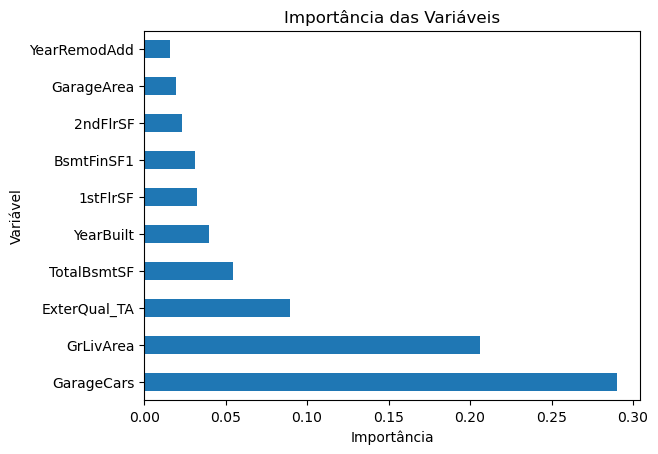

In [26]:
importances = model.feature_importances_
features = df_train.drop('SalePrice', axis=1).columns

importance_series = pd.Series(importances, index=features)
sorted_importances = importance_series.sort_values(ascending=False)

# Visualizando as 10 variáveis mais importantes
sorted_importances[:10].plot(kind='barh')
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

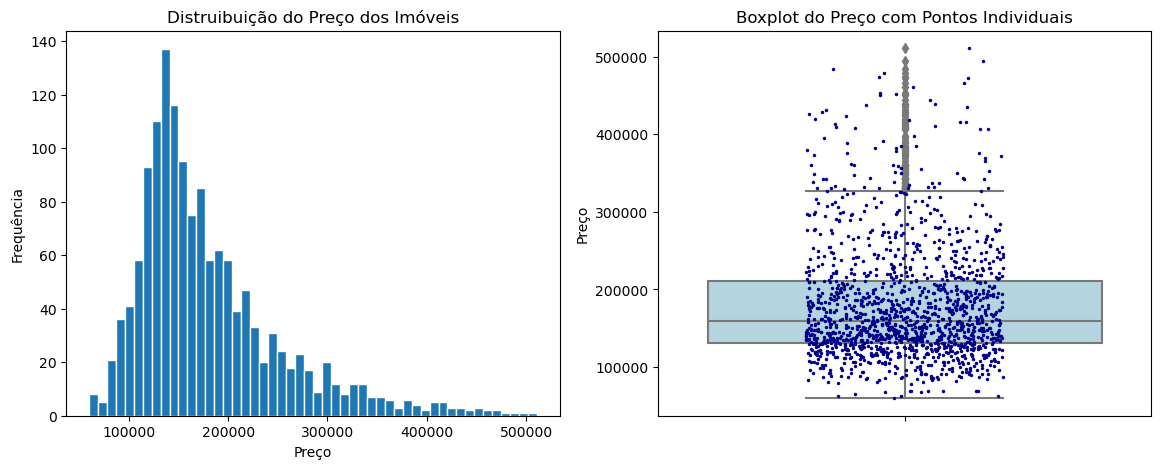

In [27]:
fig, axs = plt.subplots(1,2, figsize=(14,5))

axs[0].hist(df_previsoes['SalePrice'], bins=50, edgecolor='white')
axs[0].set_ylabel('Frequência')
axs[0].set_xlabel('Preço')
axs[0].set_title('Distruibuição do Preço dos Imóveis')

sns.boxplot(y=df_previsoes['SalePrice'], color='lightblue', ax=axs[1])
sns.stripplot(y=df_previsoes['SalePrice'], color='darkblue', jitter=0.2, size=2.5, ax=axs[1])
axs[1].set_ylabel('Preço')
axs[1].set_title('Boxplot do Preço com Pontos Individuais')

plt.show()
